

1.   **Importing essential libraries**



In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2.  **Load Dataset**



In [ ]:
df = pd.read_csv ('/content/ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
df=df.drop('TWF',1)
df=df.drop('HDF',1)
df=df.drop('PWF',1)
df=df.drop('OSF',1)
df=df.drop('RNF',1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


In [ ]:
#La colonne Product ID contient un mélange des chiffres et des lettres, il faut l'encoder ainsi que la colonne Type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Product ID'] = label_encoder.fit_transform(df['Product ID'])
df['Type'] = label_encoder.fit_transform(df['Type'])

Text(0.5, 1.0, 'Non-failure vs Failure')

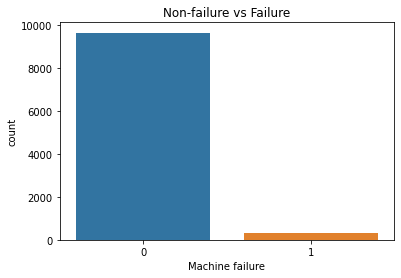

In [ ]:
sns.countplot(x='Machine failure', data=df)
plt.title('Non-failure vs Failure')

In [ ]:
#undersampling our dataset 

# class count
class_count_0, class_count_1 = df['Machine failure'].value_counts()

# Separate class
class_0 = df[df['Machine failure'] == 0]
class_1 = df[df['Machine failure'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (9661, 9)
class 1: (339, 9)


In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Machine failure'].value_counts())

total class of 1 and0: 1    339
0    339
Name: Machine failure, dtype: int64


Text(0.5, 1.0, 'Non-failure vs Failure')

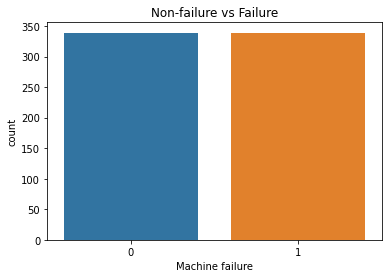

In [ ]:
# plot the count after under-sampeling
sns.countplot(x='Machine failure', data=test_under)
plt.title('Non-failure vs Failure')

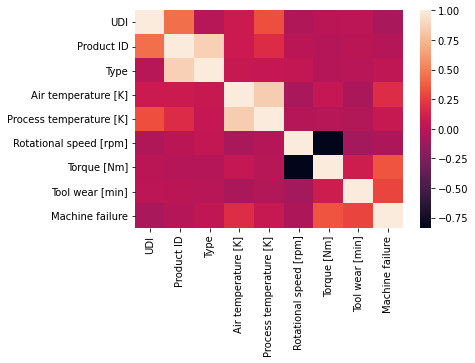

In [ ]:
corr=test_under.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Data splitting and normalisation 

In [ ]:
X=test_under.drop(['Machine failure'], axis=1).values
Y=test_under['Machine failure'].values


In [ ]:
X


array([[9.640e+02, 1.582e+03, 1.000e+00, ..., 1.621e+03, 3.160e+01,
        9.500e+01],
       [6.247e+03, 6.210e+02, 0.000e+00, ..., 1.457e+03, 4.680e+01,
        1.820e+02],
       [1.237e+03, 1.460e+02, 0.000e+00, ..., 1.359e+03, 4.660e+01,
        1.760e+02],
       ...,
       [9.823e+03, 6.905e+03, 1.000e+00, ..., 1.360e+03, 6.090e+01,
        1.870e+02],
       [9.831e+03, 6.910e+03, 1.000e+00, ..., 1.337e+03, 5.610e+01,
        2.060e+02],
       [9.975e+03, 6.991e+03, 1.000e+00, ..., 1.361e+03, 6.820e+01,
        1.720e+02]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)
X_scaled

array([[-1.47753323, -1.16960851, -0.29069528, ...,  0.37117913,
        -0.95740061, -0.41560137],
       [ 0.53814013, -1.51951763, -2.0195672 , ..., -0.18770816,
         0.10994986,  0.82999908],
       [-1.37337294, -1.6924696 , -2.0195672 , ..., -0.52167739,
         0.09590577,  0.7440956 ],
       ...,
       [ 1.9025255 ,  0.76854578, -0.29069528, ..., -0.51826954,
         1.10005786,  0.90158532],
       [ 1.90557782,  0.77036632, -0.29069528, ..., -0.59665008,
         0.76299981,  1.173613  ],
       [ 1.96051951,  0.79985918, -0.29069528, ..., -0.51486169,
         1.61266696,  0.68682662]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test =train_test_split(X_scaled, Y ,test_size=0.25, random_state=42)

In [ ]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((508, 8), (170, 8), (508,), (170,))

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("Tuned hyperparameters",logreg_cv.best_params_)
print("accuracy",logreg_cv.best_score_)

Tuned hyperparameters {'C': 10.0, 'penalty': 'l2'}
accuracy 0.8129803921568628


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        95
           1       0.76      0.81      0.79        75

    accuracy                           0.81       170
   macro avg       0.80      0.81      0.80       170
weighted avg       0.81      0.81      0.81       170

[[76 19]
 [14 61]]


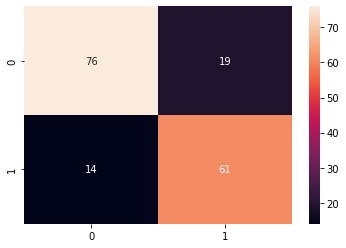

In [ ]:
best_logreg=LogisticRegression(C=10.0,penalty="l2")
best_logreg.fit(X_train,y_train)
y_pred=best_logreg.predict(X_test)
cmG=confusion_matrix(y_test,y_pred)
sns.heatmap(cmG,annot=True)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

## 2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 13)}
knn_gscv = GridSearchCV(knn, param_grid, cv=10 , scoring='recall')
knn_gscv.fit(X_train, y_train)

print("Tuned hyperparameters",knn_gscv.best_params_)
print("accuracy",knn_gscv.best_score_)

Tuned hyperparameters {'n_neighbors': 5}
accuracy 0.8598290598290598


In [ ]:
best_knn=KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.83      0.87        95
           1       0.81      0.91      0.86        75

    accuracy                           0.86       170
   macro avg       0.86      0.87      0.86       170
weighted avg       0.87      0.86      0.87       170

[[79 16]
 [ 7 68]]


# 3. SVM

## *Polynomial

In [ ]:
from sklearn.svm import SVC
svc_model=SVC()

param_grid_svc={'C':[0.01,0.1,1,10,100,1000], 'degree':[2,3,4,5], 'kernel':['poly']}
grid_svc=GridSearchCV(svc_model,param_grid_svc,cv=10,scoring='recall')
grid_svc.fit(X_train,y_train)
grid_svc.best_params_

{'C': 0.01, 'degree': 2, 'kernel': 'poly'}

In [ ]:
best_svc=SVC(C=0.01,degree=2)
best_svc.fit(X_train, y_train)
y_pred_svc=best_svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        95
           1       0.81      0.91      0.86        75

    accuracy                           0.86       170
   macro avg       0.86      0.87      0.86       170
weighted avg       0.87      0.86      0.87       170

[[79 16]
 [ 7 68]]


## * Gaussien

In [ ]:
param_grid_svc={'C':[0.01,0.1,1,10,100,1000], 'gamma':[0.01,0.1,1,10,100,1000], 'kernel':['rbf']}
grid_svc=GridSearchCV(svc_model,param_grid_svc,cv=10,scoring='recall')
grid_svc.fit(X_train,y_train)
grid_svc.best_params_

{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
best_svc=SVC(C=0.01,gamma=0.01)
best_svc.fit(X_train, y_train)
y_pred_svc=best_svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        95
           1       0.81      0.91      0.86        75

    accuracy                           0.86       170
   macro avg       0.86      0.87      0.86       170
weighted avg       0.87      0.86      0.87       170

[[79 16]
 [ 7 68]]


# 4. MLP Classifier


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp=MLPClassifier(max_iter=100)
parameter_space={ 'hidden_layer_sizes':[(50,50,50),(50,100,50),(100,)], "activation":["tanh","relu"],"alpha":[0.0001,0.05]}
clf=GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=10, scoring='recall')
clf.fit(X_train, y_train)
print("Best parameters found \n", clf.best_params_)

Best parameters found 
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50)}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:

grid_mlp= MLPClassifier(max_iter=100, activation= 'relu', alpha= 0.0001, hidden_layer_sizes= (50, 100, 50))
grid_mlp.fit(X_train, y_train)
y_pred=grid_mlp.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.93      0.88      0.90        75

    accuracy                           0.92       170
   macro avg       0.92      0.91      0.92       170
weighted avg       0.92      0.92      0.92       170

[[90  5]
 [ 9 66]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#  5. Decision tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_model=DecisionTreeClassifier()
tree_params={'max_depth': range(1,4), 'max_features': range(3,6), 'criterion': ['gini', 'entropy'] }
tree_classifier= GridSearchCV(tree_model,tree_params , cv=10, scoring='recall')
tree_classifier.fit(X_train,y_train)
tree_classifier.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 5}

In [ ]:
grid_tree_classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features=4)
grid_tree_classifier.fit(X_train,y_train)
y_pred = grid_tree_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        95
           1       0.90      0.76      0.83        75

    accuracy                           0.86       170
   macro avg       0.87      0.85      0.85       170
weighted avg       0.86      0.86      0.86       170

[[89  6]
 [18 57]]


In [ ]:
pip install graphviz


In [ ]:
pip install pydotplus

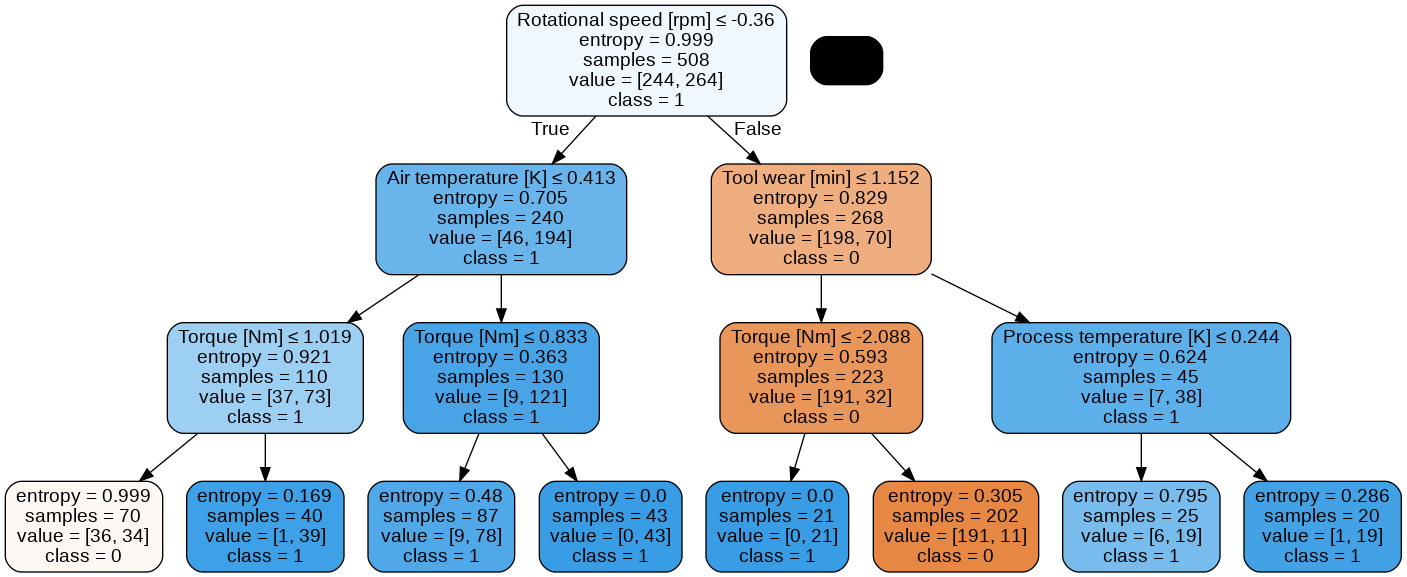

In [ ]:
feature_cols = ['UDI','Product ID','Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(grid_tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Machine Failure.png')
Image(graph.create_png())

# 6.Adaboost Classifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc= AdaBoostClassifier()
abc_params={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
abc=GridSearchCV(abc,abc_params , cv=10, scoring='recall')
abc.fit(X_train,y_train)
abc.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [ ]:
grid_abc = AdaBoostClassifier(n_estimators=500, learning_rate=0.01)
grid_abc.fit(X_train,y_train)
y_pred = grid_tree_classifier.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        95
           1       0.90      0.76      0.83        75

    accuracy                           0.86       170
   macro avg       0.87      0.85      0.85       170
weighted avg       0.86      0.86      0.86       170

[[89  6]
 [18 57]]
